In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

groq_api_key = os.getenv("GROQ_API_KEY")
if groq_api_key is None:
    raise ValueError("GROQ_API_KEY environment variable is not set")
os.environ["GROQ_API_KEY"] = groq_api_key

from langchain_groq import ChatGroq

llm = ChatGroq(model="llama-3.3-70b-versatile")

In [2]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image ,display

class State(TypedDict):
    name:str
    career:str
    repos:str
    tech_stack:str
    summary:str

In [3]:
def top_github_repos(state:State):
    msg=llm.invoke(f"""
                   You are an expert roadmap creator.
                   Generate a precise roadmap for user whose name is {state["name"]}.
                   User wants to build a career in {state['career']}.
                   Fetch the link of top GitHub repositories which provides roadmap based on {state['career']} in Markdown formatting.
    """)
    return {"repos":msg.content}

In [4]:
def list_tech_stack(state:State):
    msg=llm.invoke(f"""
                   Based on provided {state['career']}, create a list of technical skills required to master it.
                   Create a bullet-wise list with Markdown formatting. 
    """)
    return {"tech_stack":msg.content}

In [5]:
def generate_summary(state:State):
    msg=llm.invoke(f"""
                   After fetching top GitHub Repos from {state['repos']} and technical skill requirements from {state['tech_stack']},
                   Now generate a brief summary to guide {state['name']} based on the given Roadmap.
                   Use Markdown formatting.
    """)
    return {"summary":msg.content}

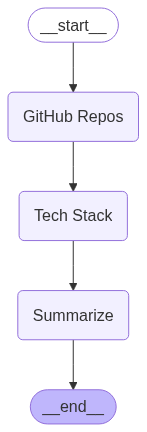

In [6]:
graph = StateGraph(State)

graph.add_node("GitHub Repos", top_github_repos)
graph.add_node("Tech Stack", list_tech_stack)
graph.add_node("Summarize", generate_summary)
graph.add_edge(START,"GitHub Repos")
graph.add_edge("GitHub Repos","Tech Stack")
graph.add_edge("Tech Stack","Summarize")
graph.add_edge("Summarize",END)

compiled_graph = graph.compile()

graph_image = compiled_graph.get_graph().draw_mermaid_png()
display(Image(graph_image))

In [7]:
from IPython.display import Markdown

name = "Soham"
career = "AI Agents Developer"

state = compiled_graph.invoke({
    "name":name,
    "career":career,
})

In [8]:
Markdown(state['repos'])

**Soham's Roadmap to Becoming an AI Agents Developer**
=====================================================

### Phase 1: Foundations (3-6 months)

1. **Programming skills**:
	* Python programming language (focus on Python 3.x)
	* Familiarity with data structures and algorithms
2. **Mathematics**:
	* Linear Algebra
	* Calculus
	* Probability and Statistics
3. **Introduction to AI and Machine Learning**:
	* Study the basics of AI, Machine Learning, and Deep Learning
	* Familiarize yourself with popular libraries like TensorFlow, PyTorch, or Keras

### Phase 2: AI Fundamentals (6-12 months)

1. **Machine Learning**:
	* Study supervised, unsupervised, and reinforcement learning
	* Learn about neural networks, convolutional neural networks, and recurrent neural networks
2. **Deep Learning**:
	* Study deep learning architectures and techniques
	* Learn about transfer learning, fine-tuning, and regularization
3. **AI Agents**:
	* Study the basics of AI agents, including agent types, agent architectures, and decision-making processes

### Phase 3: Specialization (6-12 months)

1. **Agent Development**:
	* Learn about agent development frameworks like Unity ML-Agents or Google's Dopamine
	* Study agent training methods, including reinforcement learning and imitation learning
2. **Agent Deployment**:
	* Learn about deploying agents in various environments, including simulations and real-world scenarios
	* Study agent evaluation metrics and methods
3. **Advanced Topics**:
	* Study advanced topics like multi-agent systems, agent communication, and agent reasoning

### Phase 4: Practice and Projects (6-12 months)

1. **Personal Projects**:
	* Develop personal projects that integrate AI agents, such as games, simulations, or chatbots
	* Experiment with different agent architectures and training methods
2. **Contributions to Open-Source**:
	* Contribute to open-source projects related to AI agents, such as [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents) or [Google's Dopamine](https://github.com/google/dopamine)
3. **Participation in Competitions**:
	* Participate in AI-related competitions, such as the [AI Alignment Prize](https://www.aialignmentprize.com/) or [Google's AI Challenge](https://ai.google/challenge)

### Top GitHub Repositories for AI Agents Developer Roadmap

Here are some top GitHub repositories that provide a roadmap for AI Agents Developer:
* [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents): A popular open-source framework for developing AI agents.
* [Google's Dopamine](https://github.com/google/dopamine): A research framework for developing AI agents, focusing on reinforcement learning and multi-agent systems.
* [Stanford CS229: Machine Learning](https://github.com/CS229/stanford-cs229-machine-learning): A GitHub repository for Stanford University's CS229: Machine Learning course, which covers the basics of machine learning and AI.
* [Deep RL](https://github.com/ShangtongZhang/DeepRL): A GitHub repository for deep reinforcement learning, covering topics like DQN, PG, and Actor-Critic methods.
* [AI Alignment Prize](https://github.com/ai-alignment-prize/ai-alignment-prize): A GitHub repository for the AI Alignment Prize, which focuses on developing AI systems that align with human values.

These repositories provide a wealth of information, including tutorials, examples, and research papers, to help you become an AI Agents Developer. Remember to practice regularly, work on personal projects, and contribute to open-source projects to reinforce your learning.

### Additional Resources

* **Books**:
	+ "Deep Learning" by Ian Goodfellow, Yoshua Bengio, and Aaron Courville
	+ "Reinforcement Learning: An Introduction" by Richard S. Sutton and Andrew G. Barto
* **Courses**:
	+ [Stanford CS229: Machine Learning](https://stanford.edu/~shervine/l/d/deep-learning)
	+ [Deep RL](https://www.deep rl.com/)
* **Communities**:
	+ [Kaggle](https://www.kaggle.com/)
	+ [Reddit: r/MachineLearning](https://www.reddit.com/r/MachineLearning/)

In [9]:
Markdown(state['tech_stack'])

### Technical Skills Required to Master AI Agents Developer
To become proficient in AI Agents Developer, the following technical skills are necessary:
* **Programming languages**: Proficiency in languages such as Python, Java, C++, or MATLAB to develop and implement AI models
* **Machine learning frameworks**: Experience with popular frameworks like TensorFlow, PyTorch, or Scikit-learn to build and train AI models
* **Deep learning**: Knowledge of deep learning techniques, including convolutional neural networks (CNNs), recurrent neural networks (RNNs), and long short-term memory (LSTM) networks
* **Natural language processing (NLP)**: Understanding of NLP concepts, including text preprocessing, tokenization, and sentiment analysis
* **Computer vision**: Familiarity with computer vision techniques, including image processing, object detection, and image classification
* **Data structures and algorithms**: Strong understanding of data structures like arrays, linked lists, and graphs, as well as algorithms like sorting, searching, and graph traversal
* **Database management**: Knowledge of database management systems, including data modeling, data warehousing, and data querying
* **Cloud computing**: Experience with cloud platforms like AWS, Azure, or Google Cloud to deploy and manage AI models
* **Containerization**: Familiarity with containerization tools like Docker to package and deploy AI applications
* **API design**: Understanding of API design principles, including RESTful APIs, API security, and API documentation
* **Testing and debugging**: Knowledge of testing frameworks and debugging tools to ensure the quality and reliability of AI models
* **DevOps**: Familiarity with DevOps practices, including continuous integration, continuous deployment, and continuous monitoring
* **Data visualization**: Understanding of data visualization tools and techniques, including data storytelling and visualization best practices
* **Collaboration tools**: Experience with collaboration tools like Git, GitHub, or Bitbucket to manage code repositories and collaborate with team members.

In [10]:
Markdown(state['summary'])

### Summary of Soham's Roadmap to Becoming an AI Agents Developer
To become an AI Agents Developer, Soham should follow a structured roadmap that covers foundations, AI fundamentals, specialization, and practice. Here's a brief summary:

#### Key Phases
1. **Phase 1: Foundations** (3-6 months): Focus on programming skills (Python), mathematics (Linear Algebra, Calculus, Probability, and Statistics), and introduction to AI and Machine Learning.
2. **Phase 2: AI Fundamentals** (6-12 months): Study Machine Learning, Deep Learning, and AI Agents, including supervised, unsupervised, and reinforcement learning.
3. **Phase 3: Specialization** (6-12 months): Learn about agent development frameworks, deployment, and evaluation metrics, as well as advanced topics like multi-agent systems.
4. **Phase 4: Practice and Projects** (6-12 months): Develop personal projects, contribute to open-source projects, and participate in AI-related competitions.

#### Top GitHub Repositories
* [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents)
* [Google's Dopamine](https://github.com/google/dopamine)
* [Stanford CS229: Machine Learning](https://github.com/CS229/stanford-cs229-machine-learning)
* [Deep RL](https://github.com/ShangtongZhang/DeepRL)
* [AI Alignment Prize](https://github.com/ai-alignment-prize/ai-alignment-prize)

#### Additional Resources
* Books: "Deep Learning" and "Reinforcement Learning: An Introduction"
* Courses: Stanford CS229: Machine Learning and Deep RL
* Communities: Kaggle, Reddit: r/MachineLearning

#### Technical Skills Required
* Programming languages: Python, Java, C++, MATLAB
* Machine learning frameworks: TensorFlow, PyTorch, Scikit-learn
* Deep learning techniques: CNNs, RNNs, LSTMs
* NLP, computer vision, data structures, algorithms, database management, cloud computing, containerization, API design, testing, and debugging.

By following this roadmap and acquiring the necessary technical skills, Soham can become proficient in AI Agents Development and achieve his goals.